In [28]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [29]:
# Load the YOLOv8 model
model_path = "models/best.pt"
model = YOLO(model_path)

In [30]:
# Load an image for prediction
image_path = "temp_images/4.jpg"  # Đường dẫn tới hình ảnh cần dự đoán
results = model.predict(source=image_path, conf=0.5, save=True, save_txt=True)


image 1/1 d:\TIEULUANTOTNGHIEP\tieuluan\temp_images\4.jpg: 640x480 16 objects, 311.1ms
Speed: 4.0ms preprocess, 311.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict3
1 label saved to runs\detect\predict3\labels


In [38]:
import torch
if torch.cuda.is_available():
        device = 'cuda'
else:
    device = 'cpu'

class Detector:
    def __init__(self):
        self.model = YOLO(model_path)

    def get_output_image_and_yolo_boxes(self, img_path):
        """
        Nhận đường dẫn hình ảnh, trả về:
        - outputImg: Hình ảnh với bounding box.
        - listYoloBoxes: Danh sách bounding box.
        """
        # Đọc hình ảnh từ đường dẫn
        img = cv2.imread(img_path)

        # Thực hiện dự đoán
        result = self.model(img, device=device)

        # Sao chép ảnh để vẽ bounding box
        outputImg = img.copy()

        # Trích xuất thông tin từ kết quả
        bboxes = result[0].boxes
        listYoloBoxes = []
        if len(bboxes) > 0:
            for box in bboxes:
                # Lấy tọa độ, độ tin cậy và nhãn lớp
                coords = box.xyxy[0].cpu().numpy()  # Tọa độ bounding box [x1, y1, x2, y2]
                conf = box.conf[0].item()          # Độ tin cậy
                cls = int(box.cls[0].item())       # Nhãn lớp

                # Vẽ bounding box màu xanh lá cây
                x1, y1, x2, y2 = map(int, coords)
                cv2.rectangle(outputImg, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Xanh lá cây

                # Thêm nhãn và độ tin cậy màu đỏ
                label = f"{self.model.names[cls]}: {conf:.2f}"
                cv2.putText(outputImg, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)  # Đỏ

                # Lưu thông tin bounding box
                listYoloBoxes.append({
                    "coords": coords,
                    "confidence": conf,
                    "class_id": cls
                })

        return outputImg, listYoloBoxes





0: 640x480 16 objects, 363.6ms
Speed: 2.1ms preprocess, 363.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


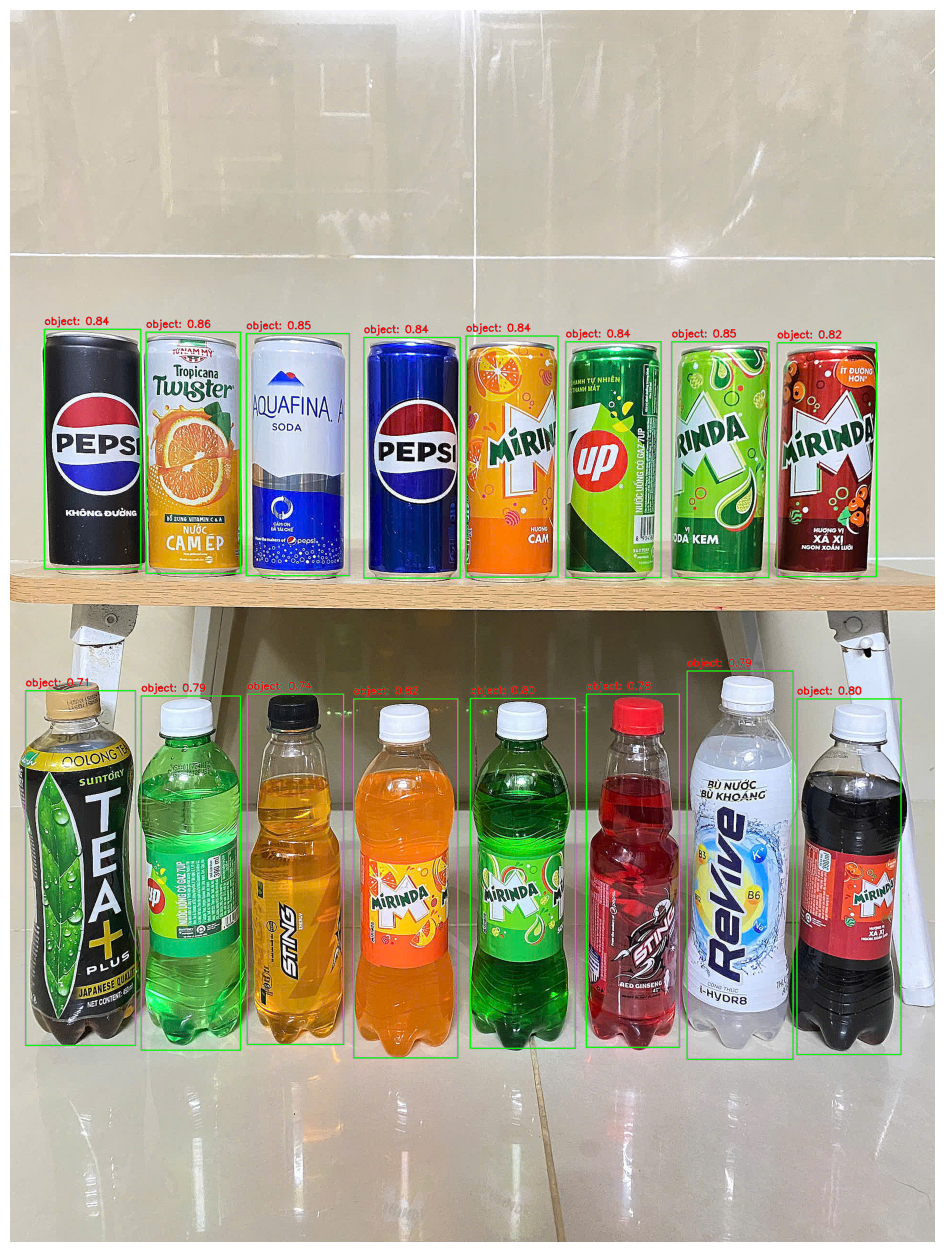

Processed image saved to output_image_sharpened.png


In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Khởi tạo Detector
detector = Detector()

# Chạy mô hình YOLO trên ảnh và lấy kết quả
output_img, yolo_boxes = detector.get_output_image_and_yolo_boxes(image_path)

# Áp dụng bộ lọc làm sắc nét để tăng độ rõ nét
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Kernel Sharpening
output_img = cv2.filter2D(src=output_img, ddepth=-1, kernel=kernel)

# Chuyển đổi ảnh sau phát hiện đối tượng sang RGB để hiển thị trong matplotlib
output_img_rgb = cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh sau khi phát hiện đối tượng với matplotlib
plt.figure(figsize=(24, 16))  # Hiển thị ảnh lớn hơn với kích thước tùy chỉnh
plt.imshow(output_img_rgb)  # Sử dụng ảnh RGB để đảm bảo màu sắc chính xác
plt.axis('off')  # Tắt trục để ảnh rõ hơn
plt.show()

# Lưu ảnh kết quả nếu cần
output_image_path = "output_image_sharpened.png"
cv2.imwrite(output_image_path, output_img)
print(f"Processed image saved to {output_image_path}")
